In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from altair import *
import math
import os
import pandas as pd
from collections import Counter
from wordcloud import *
import string
import re
import random
from nltk.corpus import stopwords
from wordcloud import *
import textblob
import psycopg2
import plotly as py
from scipy.misc import imread

In [2]:
un = pd.read_csv('/home/faculty/millbr02/pub/un-debates-augmented-2.csv')
un.head()

Unnamed: 0  session  year country  \
0           0       44  1989     MDV   
1           1       44  1989     FIN   
2           2       44  1989     NER   
3           3       44  1989     URY   
4           4       44  1989     ZWE   

                                                text      name  \
0  ï»¿It is indeed a pleasure for me and the memb...  Maldives   
1  ï»¿\nMay I begin by congratulating you. Sir, o...   Finland   
2  ï»¿\nMr. President, it is a particular pleasur...     Niger   
3  ï»¿\nDuring the debate at the fortieth session...   Uruguay   
4  ï»¿I should like at the outset to express my d...  Zimbabwe   

                      region      continent    text_fk    text_dc  text_smog  \
0  Southern and Central Asia           Asia  12.853905  10.080823  14.436922   
1           Nordic Countries         Europe  11.261403   9.759876  13.475801   
2             Western Africa         Africa  14.960497  10.494894  15.348236   
3              South America  South America  15.759916  10.558519  16.124083   
4             Eastern Africa         Africa  11.906717   9.389096  13.257988   

   population  lifeexpectancy       gnp  surfacearea    lat  long  
0      286000            62.2     199.0        298.0   3.25  73.0  
1     5171300            77.4  121914.0     338145.0  64.00  26.0  
2    10730000            41.3    1706.0    1267000.0  16.00   8.0  
3     3337000            75.2   20831.0     175016.0 -33.00 -56.0  
4    11669000            37.8    5951.0     390757.0 -20.00  30.0

## Predicting whether the text was positive or negative, adding it to the dataframe

In [11]:
def tb_predict(text):
    if tb_score(text) <= 0:
        return 'negative'
    else:
        return 'positive'
    
def tb_score(text):
    res = textblob.TextBlob(text)
    return res.sentiment.polarity

In [12]:
un['tbpredict'] = un.text.map(tb_predict)

In [32]:
un.head()

Unnamed: 0  session  year country  \
0           0       44  1989     MDV   
1           1       44  1989     FIN   
2           2       44  1989     NER   
3           3       44  1989     URY   
4           4       44  1989     ZWE   

                                                text      name  \
0  ï»¿It is indeed a pleasure for me and the memb...  Maldives   
1  ï»¿\nMay I begin by congratulating you. Sir, o...   Finland   
2  ï»¿\nMr. President, it is a particular pleasur...     Niger   
3  ï»¿\nDuring the debate at the fortieth session...   Uruguay   
4  ï»¿I should like at the outset to express my d...  Zimbabwe   

                      region      continent    text_fk    text_dc  text_smog  \
0  Southern and Central Asia           Asia  12.853905  10.080823  14.436922   
1           Nordic Countries         Europe  11.261403   9.759876  13.475801   
2             Western Africa         Africa  14.960497  10.494894  15.348236   
3              South America  South America  15.759916  10.558519  16.124083   
4             Eastern Africa         Africa  11.906717   9.389096  13.257988   

   population  lifeexpectancy       gnp  surfacearea    lat  long  \
0      286000            62.2     199.0        298.0   3.25  73.0   
1     5171300            77.4  121914.0     338145.0  64.00  26.0   
2    10730000            41.3    1706.0    1267000.0  16.00   8.0   
3     3337000            75.2   20831.0     175016.0 -33.00 -56.0   
4    11669000            37.8    5951.0     390757.0 -20.00  30.0   

                                          clean_text tbpredict  
0  »¿it is indeed  pleasure for me and the member...  positive  
1  »¿\nmay  begin by congratulating you sir on yo...  positive  
2  »¿\nmr president it is  particular pleasure fo...  positive  
3  »¿\nduring the debate at the fortieth session ...  positive  
4  »¿ should like at the outset to express my del...  positive

In [33]:
pd.value_counts(un['tbpredict'].values)

positive    7505
negative       2
dtype: int64

## Determining the sentiment score for each text, adding it to the dataframe

In [34]:
un['tbscore'] = un.text.map(tb_score)

In [35]:
un.head()

Unnamed: 0  session  year country  \
0           0       44  1989     MDV   
1           1       44  1989     FIN   
2           2       44  1989     NER   
3           3       44  1989     URY   
4           4       44  1989     ZWE   

                                                text      name  \
0  ï»¿It is indeed a pleasure for me and the memb...  Maldives   
1  ï»¿\nMay I begin by congratulating you. Sir, o...   Finland   
2  ï»¿\nMr. President, it is a particular pleasur...     Niger   
3  ï»¿\nDuring the debate at the fortieth session...   Uruguay   
4  ï»¿I should like at the outset to express my d...  Zimbabwe   

                      region      continent    text_fk    text_dc  text_smog  \
0  Southern and Central Asia           Asia  12.853905  10.080823  14.436922   
1           Nordic Countries         Europe  11.261403   9.759876  13.475801   
2             Western Africa         Africa  14.960497  10.494894  15.348236   
3              South America  South America  15.759916  10.558519  16.124083   
4             Eastern Africa         Africa  11.906717   9.389096  13.257988   

   population  lifeexpectancy       gnp  surfacearea    lat  long  \
0      286000            62.2     199.0        298.0   3.25  73.0   
1     5171300            77.4  121914.0     338145.0  64.00  26.0   
2    10730000            41.3    1706.0    1267000.0  16.00   8.0   
3     3337000            75.2   20831.0     175016.0 -33.00 -56.0   
4    11669000            37.8    5951.0     390757.0 -20.00  30.0   

                                          clean_text tbpredict   tbscore  
0  »¿it is indeed  pleasure for me and the member...  positive  0.112954  
1  »¿\nmay  begin by congratulating you sir on yo...  positive  0.115762  
2  »¿\nmr president it is  particular pleasure fo...  positive  0.108311  
3  »¿\nduring the debate at the fortieth session ...  positive  0.081388  
4  »¿ should like at the outset to express my del...  positive  0.121631

In [78]:
finland = un[un.name == 'Finland'].groupby('year').mean()
finland.head()

Unnamed: 0  session    text_fk   text_dc  text_smog  population  \
year                                                                    
1971        2959       26  11.090092  9.379851  12.970953     5171300   
1972        6862       27  11.384369  9.719636  13.559100     5171300   
1973        6555       28  10.760637  9.525534  13.207119     5171300   
1974        5236       29  10.101507  9.448507  12.271680     5171300   
1975        1253       30  10.243901  9.731070  12.872793     5171300   

      lifeexpectancy       gnp  surfacearea   lat  long   tbscore  
year                                                               
1971            77.4  121914.0     338145.0  64.0  26.0  0.136541  
1972            77.4  121914.0     338145.0  64.0  26.0  0.094820  
1973            77.4  121914.0     338145.0  64.0  26.0  0.115172  
1974            77.4  121914.0     338145.0  64.0  26.0  0.129224  
1975            77.4  121914.0     338145.0  64.0  26.0  0.194813

## Line graph of Finland's sentiment score

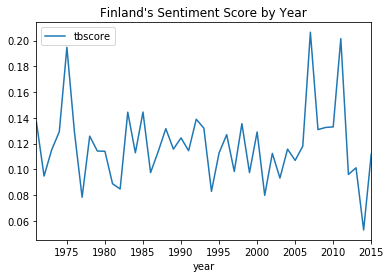

In [77]:
finland.plot(x=finland.index, y='tbscore', title = "Finland's Sentiment Score by Year")

## Key words of the year 2001

In [82]:
sw = set(stopwords.words())

In [116]:
patt = re.compile(r'United Nations|United Nation|General Assembly|Organization|government|organization|people|must')

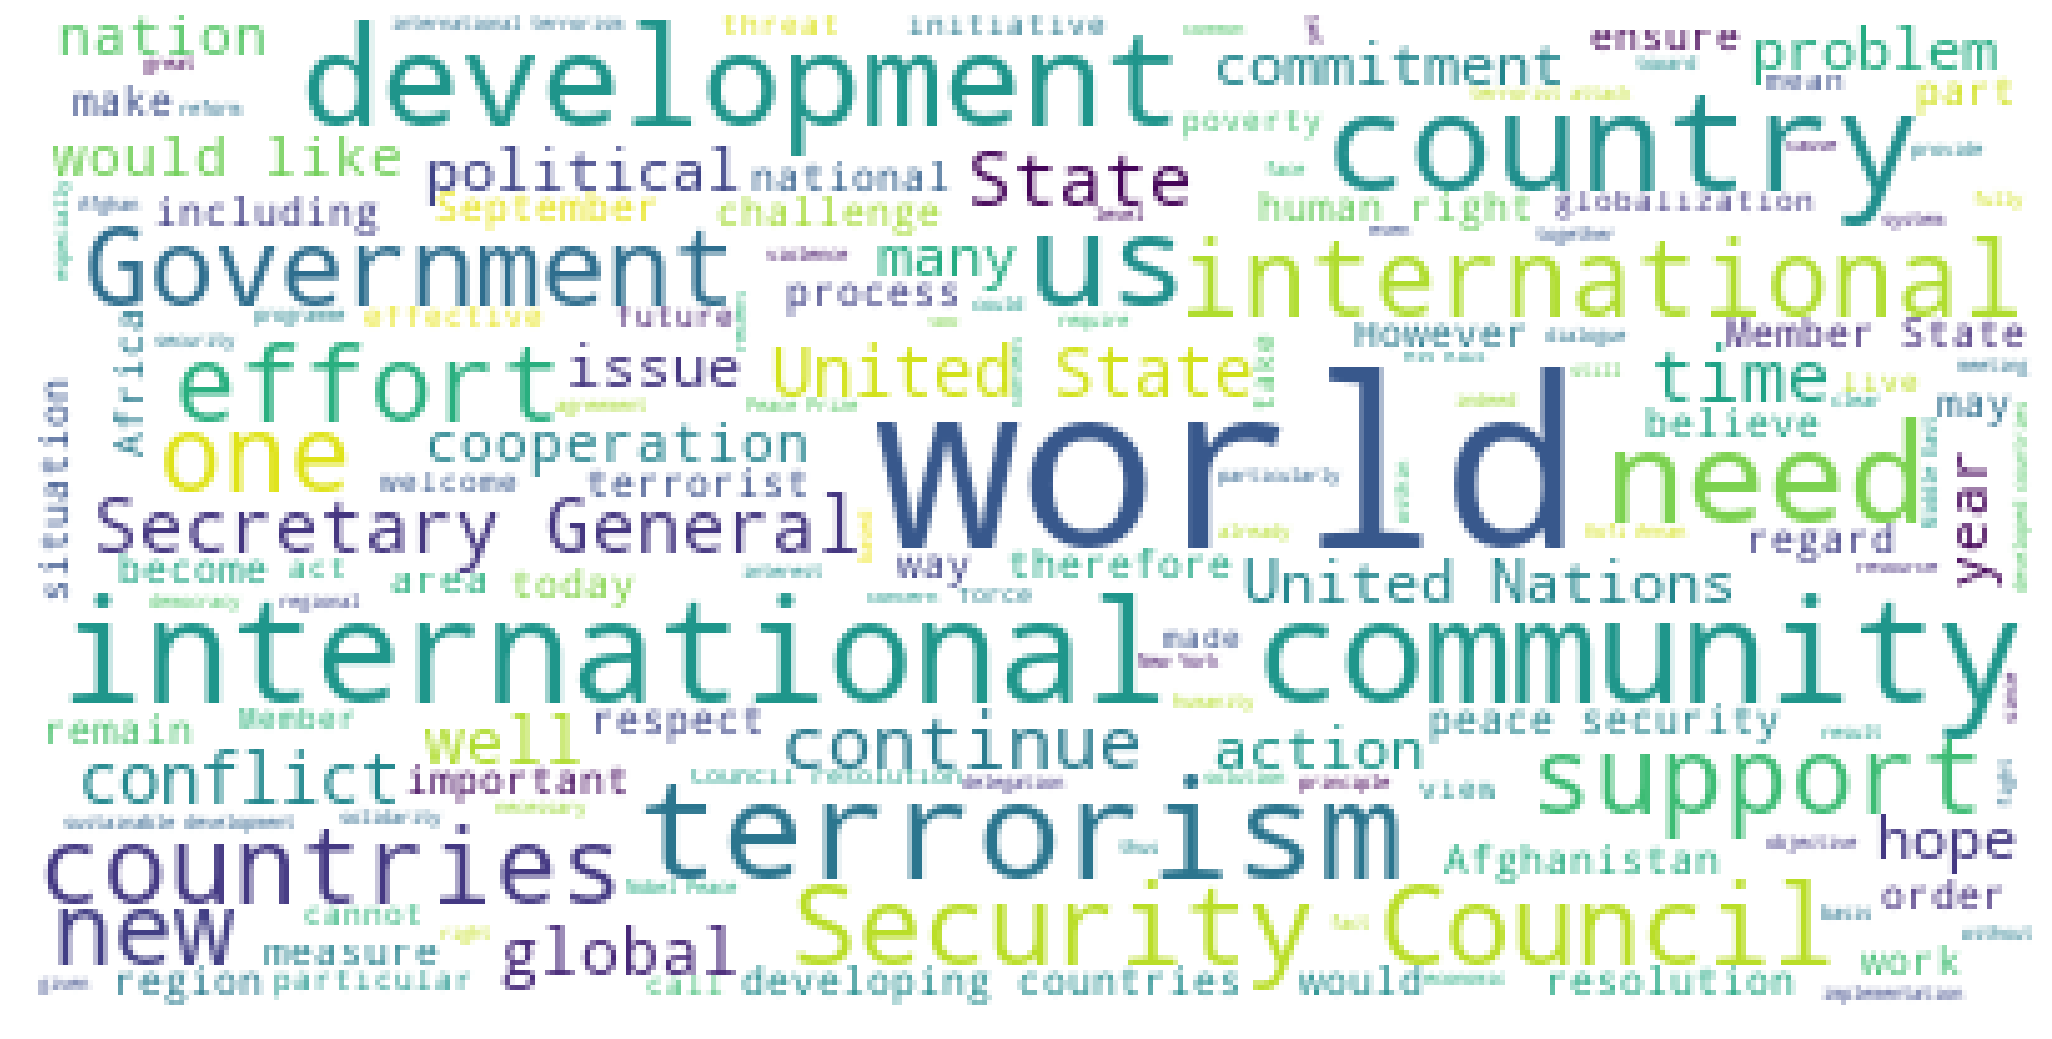

In [120]:
fig, ax = plt.subplots(figsize=(36, 20))
wcp = WordCloud(stopwords=sw, background_color='white').generate(re.sub(patt,'', " ".join(un[un.year == 2001].text)))

ax.axis('off')
ax.imshow(wcp)

In [88]:
" ".join(un[un.year == 2000].text)

"I join my colleagues in\ncongratulating the President on his election as\nPresident of the General Assembly for its fifty-fifth\nsession and you, Madam Vice-President, on your\nelection to your position.\nI am also delighted to welcome Tuvalu as the\n189th Member of the United Nations. Australia has\nlong-standing and very friendly relations with Tuvalu,\nand we have worked closely together as members of\nthe South Pacific Forum and the Commonwealth. We\nare pleased that Tuvalu is now a Member of the United\nNations, and look forward to new opportunities to work\ntogether for the United Nations common goals of peace\nand development.\nWe meet today just after the largest number of\nheads of State and Government in history gathered for\nthe Millennium Summit. While the Summit touched on\nthe multitude of problems facing the world at the start\nof a new century, a theme common to many speeches\nwas the need for the United Nations to reform so as to\nmeet the challenges of the era: the c